<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/Reconstru%C3%A7%C3%A3o_do_N%C3%ADvel_do_Mar_Relativo_nos_%C3%BAltimos_17000_anos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](http://observatoriooceanografico.org/wp-content/uploads/elementor/thumbs/logo-o2-2-p31vla9ib17i85olifd4l1xk0e5lktrkal6u0s4c6o.png)<br>
# Variação do Nível do Mar na costa brasileira

Criado por [A.L. Belém](mailto:andrebelem@id.uff.br) @ [Observatório Oceanográfico](http://www.observatoiriooceanografico.uff.br) 2024 (versão 1) para disciplina de **Mudanças Climáticas** (e para quem mais se interessar)<br>
[![DOI](https://zenodo.org/badge/342919527.svg)](https://zenodo.org/badge/latestdoi/342919527)
###### Última atualização: 14 de Abril de 2024.
<br>

### **Reconstrução da Figura 5B de Albuquerque et al. (2016)**

Este notebook tem como objetivo reconstruir a Figura 5B do estudo de Albuquerque, A. L., Meyers, P., Belem, A. L., Turcq, B., Siffedine, A., Mendoza, U., & Capilla, R. (2016) intitulado "Mineral and elemental indicators of post-glacial changes in sediment delivery and deposition under a western boundary upwelling system (Cabo Frio, southeastern Brazil)" publicado na revista Palaeogeography, palaeoclimatology, palaeoecology, 445, 72-82.

A Figura original contém curvas de variação no nível do mar relativo ao longo dos últimos 17 mil anos, com o propósito de investigar a variabilidade de frequência mais baixa. Este estudo se baseia em dados de três fontes principais:

1. Correa, I.C. (1996) Les variations du niveau de la mer durant les derniers 17.500 ans BP: I’exemple de la plateforme continentale du Rio Grande do Sul, Brésil. Marine Geology, 130, 163-178. https://doi.org/10.1016/0025-3227(95)00126-3

2. Fig. 3 de Milne, G. A., Long, A. J., & Bassett, S. E. (2005). Modelling Holocene relative sea-level observations from the Caribbean and South America. Quaternary Science Reviews, 24(10-11), 1183-1202.

3. Fig. 2 de Tarasov, L., & Peltier, W. R. (2005). Arctic freshwater forcing of the Younger Dryas cold reversal. Nature, 435(7042), 662-665. https://www.nature.com/articles/nature03617


Essas curvas foram obtidas por meio de digitalização das figuras originais em cada estudo acima, e portanto não são **valores absolutos** de RSL. **TENHA CAUTELA NO SEU USO**. Esses dados foram disponibilizados aqui para fins didáticos. A reconstrução desta figura visa proporcionar uma compreensão mais profunda da evolução do nível do mar na região de Cabo Frio, sudeste do Brasil, ao longo do tempo, e examinar como as mudanças sedimentares podem refletir as condições paleoambientais.

Para digitar as curvas, foi utilizado o aplicativo WebPlotDigitizer (https://automeris.io/WebPlotDigitizer.html).

In [26]:
# primeiro, vamos importat as curvas
import pandas as pd

base = 'https://raw.githubusercontent.com/andrebelem/pythonverse/main/datasets/'

df_correa1996 = pd.read_csv(base+'RSL_Correa1996CURVE.csv') # curvas digitalizadas

df_milne2005 = pd.read_csv(base+'RSL_CURVEMilneetal2005-figure3.csv')
df_milne2005eustatic = pd.read_csv(base+'RSL_CURVEUSTATICMilneetal2005-figure3.csv')
df_milne2005model = pd.read_csv(base+'RSL_CURVMODELMilneetal2005-figure3.csv')
df_milne2005points = pd.read_csv(base+'RSL_POINTSMilneetal2005-figure3.csv')

df_tarasov_peltier2005_curve = pd.read_csv(base+'RSL_CURVEnature03617-f2.2.csv')
df_tarasov_peltier2005_point = pd.read_csv(base+'RSL_POINTnature03617-f2.2.csv')


Note que para cada curva, é necessário algum tipo de manipulação dos dados.

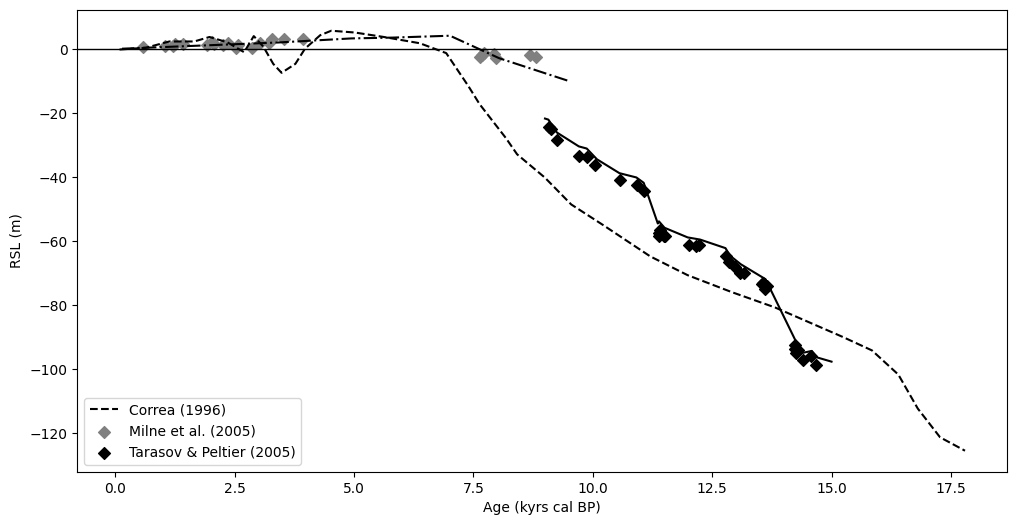

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(12,6))

plt.plot(df_correa1996['years']/1000,df_correa1996['rsl']+5,'k--',label='Correa (1996)') # corrige o datum com 5 m de ajuste

plt.plot(-df_milne2005model['kyr'],df_milne2005model['RSL'],'k-.') # corrige a idade para -kyrs cal BP
plt.scatter(-df_milne2005points['kyr'],df_milne2005points['RSL'],marker='D',color='gray',label='Milne et al. (2005)')

plt.plot(-df_tarasov_peltier2005_curve['kyr'],df_tarasov_peltier2005_curve['RSL'],'k-') # corrige a idade para -kyrs cal BP
plt.scatter(-df_tarasov_peltier2005_point['kyr'],df_tarasov_peltier2005_point['RSL'],marker='D',color='k',label='Tarasov & Peltier (2005)')

ax.set_ylabel('RSL (m)')
ax.set_xlabel('Age (kyrs cal BP)')

ax.axhline(y=0, color='k', linestyle='-', linewidth=1)

plt.legend()
plt.show()

Agora, como a ideia aqui é trabalhar na variabilidade em escala milenar, vamos agrupar todas as curvas com um delta-t igual.

In [109]:
import numpy as np

# agora compatibiliza todas as curvas

df_RSL = pd.DataFrame()

# adicione Correa 1996 (corrijindo o que for necessário)
df_temp = pd.DataFrame([df_correa1996['years'].values/1000,df_correa1996['rsl'].values+5]).T
df_temp.columns = ['kyrs','RSL']
df_RSL = pd.concat([df_RSL,df_temp],ignore_index=True,axis=0)

# adiciona Milne et al 2005
df_temp = pd.DataFrame([-df_milne2005model['kyr'].values,df_milne2005model['RSL'].values]).T
df_temp.columns = ['kyrs','RSL']
df_RSL = pd.concat([df_RSL,df_temp],ignore_index=True,axis=0)

# adiciona Tarasov e Peltier 2005
df_temp = pd.DataFrame([-df_tarasov_peltier2005_curve['kyr'].values,df_tarasov_peltier2005_curve['RSL'].values]).T
df_temp.columns = ['kyrs','RSL']
df_RSL = pd.concat([df_RSL,df_temp],ignore_index=True,axis=0)

df_RSL = df_RSL.sort_values(by='kyrs')

group_RSL = df_RSL.groupby(pd.cut(df_RSL['kyrs'], np.arange(0,18*2)/2)) # a cada 0,5 kyrs até 18kyrs cal BP

RSL_avg = group_RSL['RSL'].agg(['mean', 'std']).reset_index() # calcula média e desvio padrão
RSL_avg.iloc[:,0] = np.arange(0,18*2)[:-1]/2 # acerta a escala
RSL_avg.columns = ['kyrs_age', 'RSL_mean', 'RSL_std']

In [110]:
# veja como ficou o resultado. Valores de NaN no desvio é por conta da ausência de dados.
RSL_avg

,kyrs_age,RSL_mean,RSL_std
0,0.0,-0.015667,0.182056
1,0.5,0.415160,NaN
2,1.0,2.373650,NaN
3,1.5,3.073105,0.989179
4,2.0,2.093860,NaN
5,2.5,1.534299,3.561058
6,3.0,-2.322090,4.454778
7,3.5,-2.242780,3.363226
8,4.0,4.332130,NaN
9,4.5,4.530038,1.698483


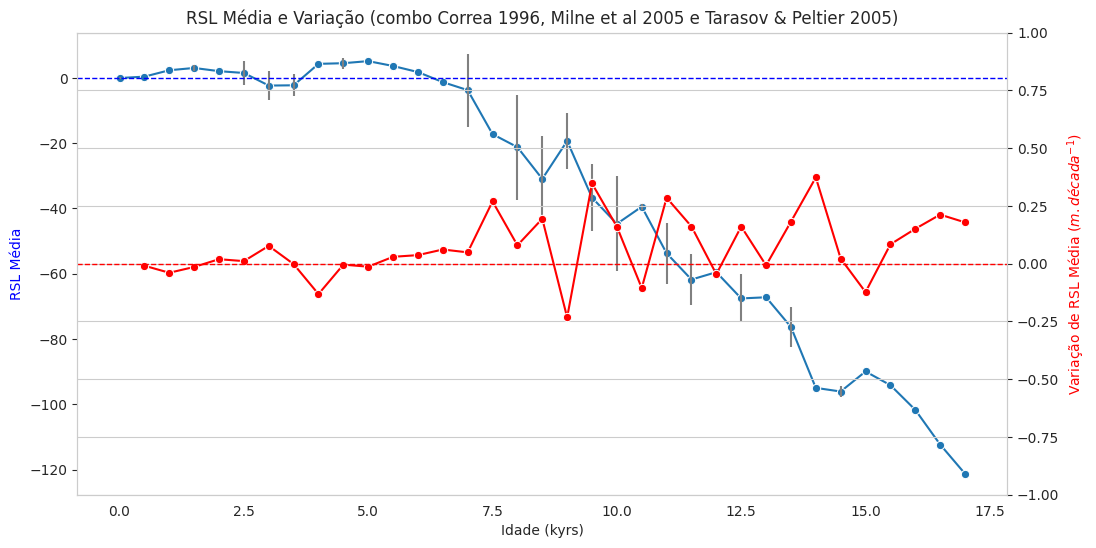

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Calculando a diferença entre os valores consecutivos de RSL_mean e estima a variação por década
RSL_avg['diff'] = -RSL_avg['RSL_mean'].diff()/50

# Criando uma figura e eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='kyrs_age', y='RSL_mean', data=RSL_avg, marker='o', errorbar='sd', ax=ax1)

# Adicionando barras de erro para representar o desvio padrão
ax1.errorbar(x=RSL_avg['kyrs_age'], y=RSL_avg['RSL_mean'], yerr=RSL_avg['RSL_std'], fmt='none', ecolor='gray')
ax1.axhline(y=0, color='b', linestyle='--', linewidth=1)

# Desligando o grid interno
ax1.grid(which='both', color='none')

# Definindo o eixo y secundário para a variação de RSL_mean
ax2 = ax1.twinx()
sns.lineplot(x='kyrs_age', y='diff', data=RSL_avg, marker='o', color='red', ax=ax2)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)

# Adicionando rótulos e título
ax1.set_xlabel('Idade (kyrs)')
ax1.set_ylabel('RSL Média', color='blue')
ax2.set_ylabel('Variação de RSL Média ($m. década^{-1}$)', color='red')
ax2.set_ylim([-1,1])
plt.title('RSL Média e Variação (combo Correa 1996, Milne et al 2005 e Tarasov & Peltier 2005)')

plt.show()


Esta reconstrução oferece um excelente exercício para contextualizar a variabilidade do nível do mar em escala geológica. É importante ressaltar que este é apenas **um exemplo didático**, mas ilustra de forma vívida como os estudos paleoceanográficos podem proporcionar insights importantes sobre as mudanças ambientais ao longo do tempo geológico.

Gostou? [☕️que tal um café ?](https://www.buymeacoffee.com/andrebelem)